<a href="https://colab.research.google.com/github/Samruddhi1907/Restaurant_Insights_Analysis-Project/blob/main/Restaurant_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project : Restaurants Data Insight Analysis**

## **Introduction**

This project delves into the analysis of a comprehensive restaurant dataset to uncover key trends and insights within the food and dining industry. Through the application of data analysis techniques and visualization, I aim to understand various aspects of the restaurant landscape, including the distribution of ratings, popular cuisine combinations, geographical distribution of establishments, characteristics of restaurant chains, and the relationship between factors like pricing and service availability. By exploring these facets, this project seeks to provide a data-driven overview of the patterns and relationships present within the provided restaurant data.

## **Dataset Overview and Basic Cleaning**

Importing some necessary libraries.

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

Loading the dataset and taking a preview of the dataset.

In [ ]:
# Dataset Loading
restaurant_df = pd.read_csv("restaurants.csv")
restaurant_df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

Getting basic information of the dataframe.

In [ ]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

Getting summary of the data.

In [ ]:
restaurant_df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

Checking for missing values.

In [ ]:
print("Missing Values (if any) in each column")
print(restaurant_df.isna().sum())

Missing Values (if any) in each column
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


Handling missing values.

In [ ]:
restaurant_df['Cuisines'] = restaurant_df['Cuisines'].fillna('Unknown')
print(restaurant_df.isna().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


## **Level 1**

---



### **Task 1 : Top Cuisines**

Extracting and Calculating the Top 3 Cuisines.

In [ ]:
all_cuisines = []
for cuisines_str in restaurant_df['Cuisines']:
  cuisines_list = [cuisines.strip() for cuisines in cuisines_str.split(',')]
  all_cuisines.extend(cuisines_list)
cuisine_counts = Counter(all_cuisines)
top_cuisines = cuisine_counts.most_common(3)
print("Top 10 Cuisines:")
for cuisine, count in top_cuisines:
  print(f"{cuisine}: {count} Restaurants")

Top 10 Cuisines:
North Indian: 3960 Restaurants
Chinese: 2735 Restaurants
Fast Food: 1986 Restaurants


Visually Representing the Top 3 Cuisines.

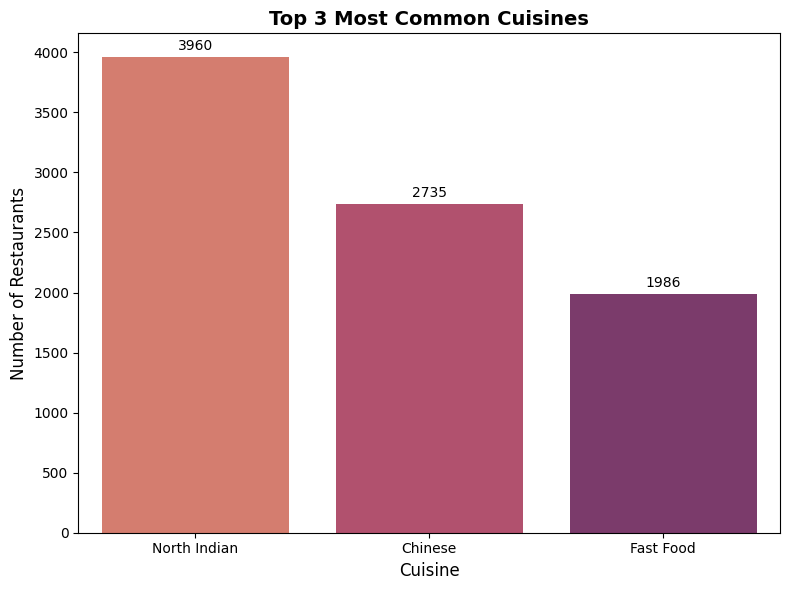

In [ ]:
# Visual of 3 Top most cuisines from data
top_cuisines_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Count'])
colors = sns.color_palette("flare", n_colors=len(top_cuisines_df))
plt.figure(figsize=(8, 6))
bars = sns.barplot(x='Cuisine', y='Count', data=top_cuisines_df, palette=colors, hue='Cuisine', legend=False)
plt.xlabel("Cuisine", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.title("Top 3 Most Common Cuisines", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for bar in bars.containers:
    bars.bar_label(bar, label_type='edge', padding=3)
plt.tight_layout()
plt.show()

Calculating the percentage of restaurants that serve each of the top cuisines.

In [ ]:
# Creating a function to calculate the percentage
total_restaurants = len(restaurant_df)
def percentage_of_restaurants(cuisine_name):
    count = restaurant_df['Cuisines'].str.contains(cuisine_name, case=False).sum()
    percentage = (count / total_restaurants) * 100
    return percentage
top_three_cuisines = ['North Indian', 'Chinese', 'Fast Food']
print("Percentage of restaurants serving each of the top three cuisines:")
for cuisine in top_three_cuisines:
    percentage = percentage_of_restaurants(cuisine)
    print(f"{cuisine}: {percentage:.2f}%")

Percentage of restaurants serving each of the top three cuisines:
North Indian: 41.46%
Chinese: 28.61%
Fast Food: 20.80%


####**Analysis**

The chart clearly indicates the popularity or prevalence of Top three cuisines within the dataset.
- North Indian cuisine is the most common among the top three, with a significantly higher number of restaurants offering it compared to Chinese and Fast Food.
- Chinese cuisine is the second most common, with a substantial number of restaurants.
- Fast Food is the third most common among these top three, but still represented by a significant number of restaurants.

In summary, if we were to look at the sheer number of restaurants in this dataset serving these cuisines, North Indian cuisine has the largest presence, followed by Chinese, and then Fast Food.

### **Task 2 : City Analysis**

Identifying the city with the highest number of restaurants.

In [ ]:
city_counts = restaurant_df['City'].value_counts()
highest_restaurant_city = city_counts.index[0]
highest_restaurant_count = city_counts.iloc[0]
print(f"The city with the highest number of restaurants is '{highest_restaurant_city}' with {highest_restaurant_count} restaurants.")

The city with the highest number of restaurants is 'New Delhi' with 5473 restaurants.


Calculating the average rating for restaurants in each city.

In [ ]:
average_ratings_by_city = restaurant_df.groupby('City')['Aggregate rating'].mean()
print("Average rating for restaurants in each city:")
print(average_ratings_by_city)

Average rating for restaurants in each city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


Determining the city with the highest average rating.

In [ ]:
highest_rated_city = average_ratings_by_city.idxmax()
highest_average_rating = average_ratings_by_city.max()
print(f"The city with the highest average rating is '{highest_rated_city}' with an average rating of {highest_average_rating:.2f}.")

The city with the highest average rating is 'Inner City' with an average rating of 4.90.


Visual Representation of the Top 10 cities with the highest average ratings.

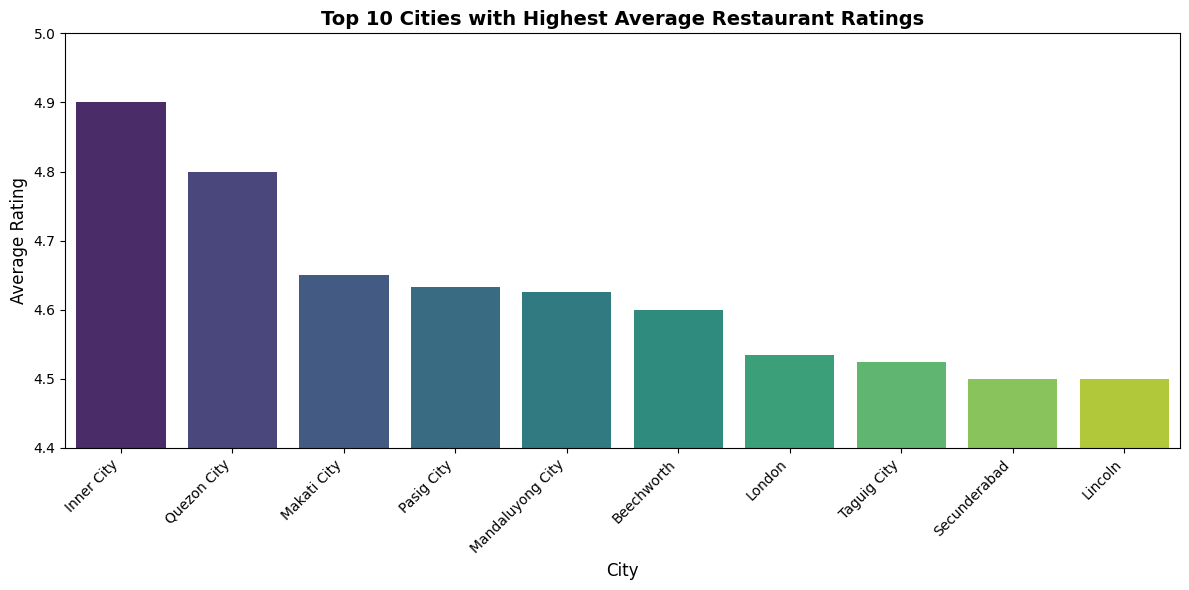

In [ ]:
average_ratings_by_city = average_ratings_by_city.sort_values(ascending=False)
top_10_cities_ratings = average_ratings_by_city.head(10)
lower_limit = top_10_cities_ratings.min() - 0.1
upper_limit = top_10_cities_ratings.max() + 0.1
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities_ratings.index, y=top_10_cities_ratings.values, palette='viridis', hue=top_10_cities_ratings.index, legend=False)
plt.xlabel("City", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Top 10 Cities with Highest Average Restaurant Ratings", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(lower_limit, upper_limit)  # Set the y-axis limits
plt.tight_layout()
plt.show()

####**Analysis**

The chart highlights the cities in the dataset where restaurants, on average, have received the highest ratings.
- Inner City stands out as having the highest average restaurant rating among these ten cities.
- Several cities, including Quezon City, Makati City, Pasig City, and Mandaluyong City, have relatively high average ratings.
- London, Taguig City, Secunderabad, and Lincoln, while still in the top 10, have slightly lower average ratings compared to the top few.

It's important to note that this chart only shows the average rating. It doesn't tell us about the distribution of ratings within each city or the number of restaurants in each city. A city with a high average rating might have only a few highly-rated restaurants, while another city might have many restaurants with slightly lower but still good ratings.

### **Task 3 : Price Range Distribution**

Visual representation of the distribution of price ranges among the restaurants.

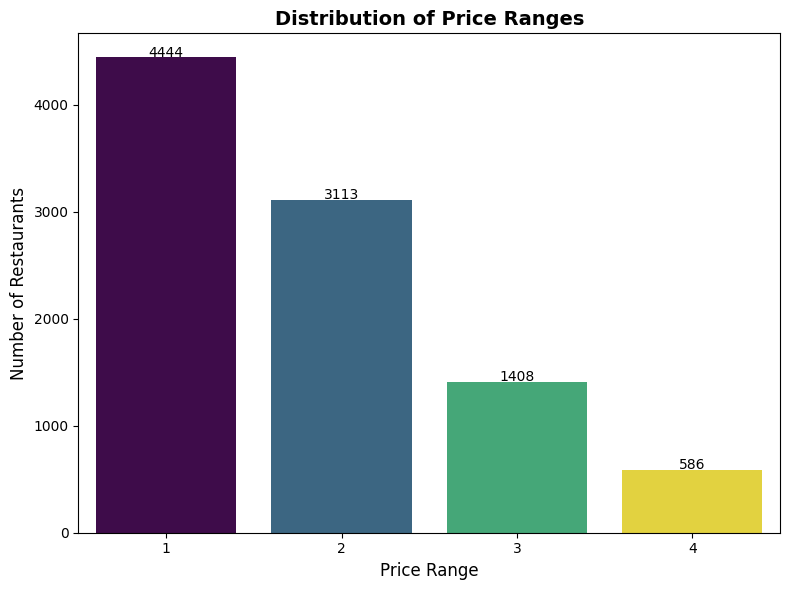

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=restaurant_df, x='Price range', palette='viridis', hue='Price range', legend=False)
plt.title('Distribution of Price Ranges', fontsize=14, fontweight='bold')
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{int(height)}',
            ha='center', fontsize=10)
plt.tight_layout()
plt.show()

Calculating the percentage of restaurants in each price range category.

In [ ]:
total_restaurants = len(restaurant_df)
price_range_percentages = restaurant_df['Price range'].value_counts(normalize=True) * 100
price_range_percentages = price_range_percentages.sort_index()
print("Percentage of restaurants in each price range:")
print(price_range_percentages)

Percentage of restaurants in each price range:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: proportion, dtype: float64


####**Analysis**

The chart shows how the restaurants in the dataset are distributed across the four defined price ranges.
- Price range 1 is the most common, containing the largest number of restaurants by a significant margin. This suggests that a majority of the restaurants in this dataset fall into the lower end of the price spectrum.
- The number of restaurants decreases as the price range increases. There are considerably fewer restaurants in price range 4 (the highest price range) compared to the others.

In summary, the dataset is heavily skewed towards restaurants in the lower price ranges, with fewer restaurants in the higher price tiers.

### **Task 4 : Online Delivery**

Determining the percentage of restaurants that offer online delivery.

In [ ]:
total_restaurants = len(restaurant_df)
online_delivery_count = restaurant_df['Has Online delivery'].value_counts()
online_delivery_percentage = (online_delivery_count['Yes'] / total_restaurants) * 100
print(f"Percentage of restaurants that offer online delivery: {online_delivery_percentage:.2f}%")

Percentage of restaurants that offer online delivery: 25.66%


Comparing the average ratings of restaurants with and without online delivery.

In [ ]:
average_ratings_online_delivery = restaurant_df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("Average ratings of restaurants with and without online delivery:")
print(average_ratings_online_delivery)

Average ratings of restaurants with and without online delivery:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64


Visual Representation of the comparison.

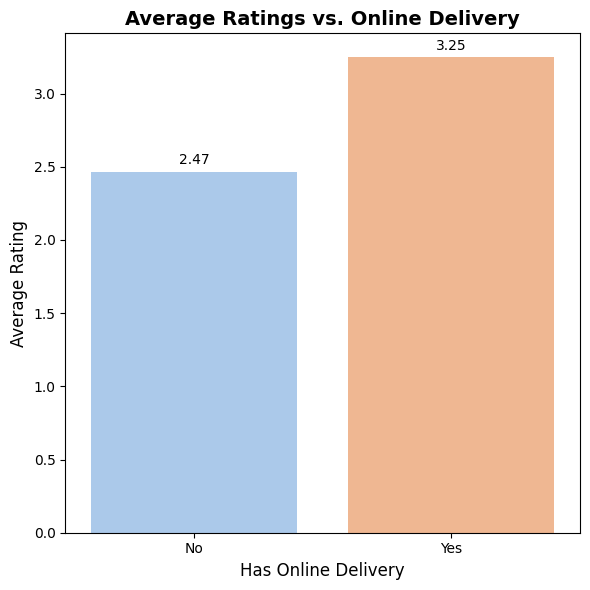

In [ ]:
online_delivery_options = ['No', 'Yes']
average_ratings = [2.465296, 3.248837]
data = pd.DataFrame({'Has Online Delivery': online_delivery_options, 'Average Rating': average_ratings})
plt.figure(figsize=(6, 6))
sns.barplot(x='Has Online Delivery', y='Average Rating', data=data, palette='pastel', hue='Has Online Delivery', legend=False)
plt.title('Average Ratings vs. Online Delivery', fontsize=14, fontweight='bold')
plt.xlabel('Has Online Delivery', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for i, v in enumerate(average_ratings):
    plt.text(i, v + 0.05, f'{v:.2f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

####**Analysis**

The chart suggests a potential relationship between the availability of online delivery and the average rating of restaurants in this dataset.
- Restaurants that offer online delivery tend to have a noticeably higher average rating (around 3.25) compared to those that do not offer online delivery (around 2.47).

This could indicate that restaurants providing online delivery are, on average, rated more favorably by users in this dataset. However, it's important to remember that correlation does not equal causation. There could be other underlying factors contributing to this difference in average ratings.

## **Level 2**

---



### **Task 1 : Restaurant Ratings**

Analyzing the distribution of aggregate ratings and determining the most common rating range.

In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
restaurant_df['Rating Range'] = pd.cut(restaurant_df['Aggregate rating'], bins=bins, labels=labels, right=False)
rating_range_counts = restaurant_df['Rating Range'].value_counts().sort_index()
print("Distribution of Aggregate Ratings:")
print(rating_range_counts)
most_common_rating_range = rating_range_counts.idxmax()
most_common_rating_range_count = rating_range_counts.max()
print(f"The most common rating range is '{most_common_rating_range}' with {most_common_rating_range_count} restaurants.")

Distribution of Aggregate Ratings:
Rating Range
0-1    2148
1-2       3
2-3    1430
3-4    4590
4-5    1380
Name: count, dtype: int64
The most common rating range is '3-4' with 4590 restaurants.


Visual representation of the rating ranges.

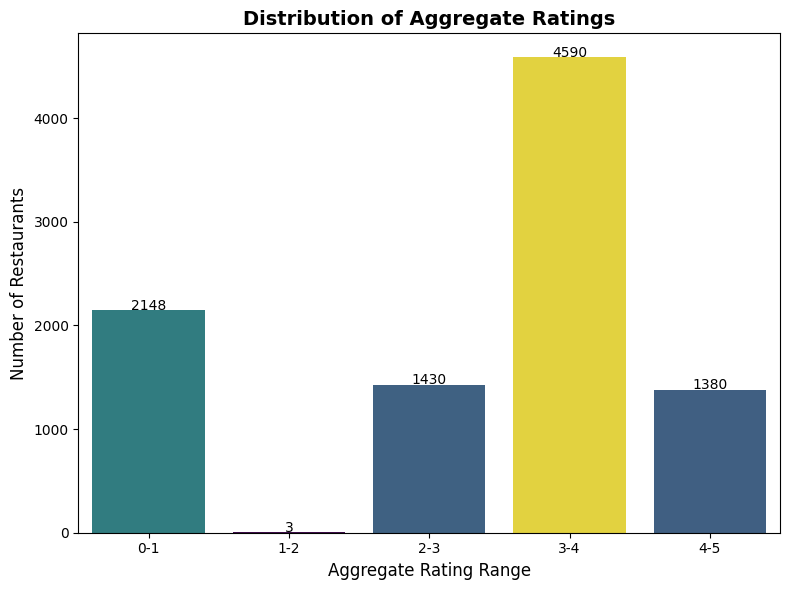

In [ ]:
rating_range_counts = restaurant_df['Rating Range'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_range_counts.index, y=rating_range_counts.values, palette='viridis', hue=rating_range_counts, legend=False)
plt.title('Distribution of Aggregate Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Aggregate Rating Range', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 5,
            f'{int(height)}',
            ha='center', fontsize=10)
plt.tight_layout()
plt.show()

Calculating the average number of votes received by restaurants.

In [ ]:
average_votes = restaurant_df['Votes'].mean()
print(f"The average number of votes received by restaurants is: {average_votes:.2f}")

The average number of votes received by restaurants is: 156.91


####**Analysis**

The chart shows how the aggregate ratings of restaurants are distributed across the dataset.
- The most common aggregate rating range for restaurants in this dataset is 3-4.
- There is also a significant number of restaurants with ratings in the 0-1 range. This might indicate a segment of restaurants with very low or potentially unrated scores.
- The number of restaurants with ratings in the 4-5 range is also notable, suggesting a good number of highly-rated establishments.
- Very few restaurants fall into the 1-2 rating range.
- The number of restaurants in the 2-3 range is moderate.

Overall, the distribution seems to be somewhat bimodal, with a large number of restaurants in the 3-4 range and another significant group in the 0-1 range.

### **Task 2 : Cuisine Combination**

Identifying the most common combinations of cuisines.

In [ ]:
restaurant_df['Cuisine Combinations'] = restaurant_df['Cuisines'].apply(lambda x: tuple(sorted(x.split(', ')) if isinstance(x, str) else ()))
cuisine_combination_counts = restaurant_df['Cuisine Combinations'].value_counts().nlargest(10)
print("Top 10 Most Common Cuisine Combinations:")
print(cuisine_combination_counts)

Top 10 Most Common Cuisine Combinations:
Cuisine Combinations
(North Indian,)                     936
(Chinese, North Indian)             616
(Mughlai, North Indian)             394
(Fast Food,)                        354
(Chinese,)                          354
(Chinese, Mughlai, North Indian)    306
(Cafe,)                             299
(Bakery,)                           218
(Bakery, Desserts)                  181
(Chinese, Fast Food)                159
Name: count, dtype: int64


Determining if certain cuisines combinations tend to have higher ratings.

In [ ]:
average_ratings_by_combination = restaurant_df.groupby('Cuisine Combinations')['Aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage Aggregate Rating by Cuisine Combination:")
print(average_ratings_by_combination.head(10))
print("\nAverage Ratings for Top 10 Most Common Cuisine Combinations:")
for combo in cuisine_combination_counts.index:
    avg_rating = average_ratings_by_combination.get(combo)
    if avg_rating is not None:
        print(f"{combo}: {avg_rating:.2f}")


Average Aggregate Rating by Cuisine Combination:
Cuisine Combinations
(American, BBQ, Sandwich)            4.9
(Bar Food, Burger, Steak)            4.9
(Contemporary, European)             4.9
(Indonesian, Sunda)                  4.9
(Hawaiian, Seafood)                  4.9
(American, Caribbean, Seafood)       4.9
(American, Coffee and Tea)           4.9
(American, Healthy Food, Mexican)    4.9
(BBQ, Breakfast, Southern)           4.9
(Deli, Italian)                      4.9
Name: Aggregate rating, dtype: float64

Average Ratings for Top 10 Most Common Cuisine Combinations:
('North Indian',): 1.67
('Chinese', 'North Indian'): 2.33
('Mughlai', 'North Indian'): 2.77
('Fast Food',): 2.12
('Chinese',): 2.04
('Chinese', 'Mughlai', 'North Indian'): 2.62
('Cafe',): 2.89
('Bakery',): 1.92
('Bakery', 'Desserts'): 2.38
('Chinese', 'Fast Food'): 2.07


Visual representation of average ratings for top 10 most common cuisine combinations identified.

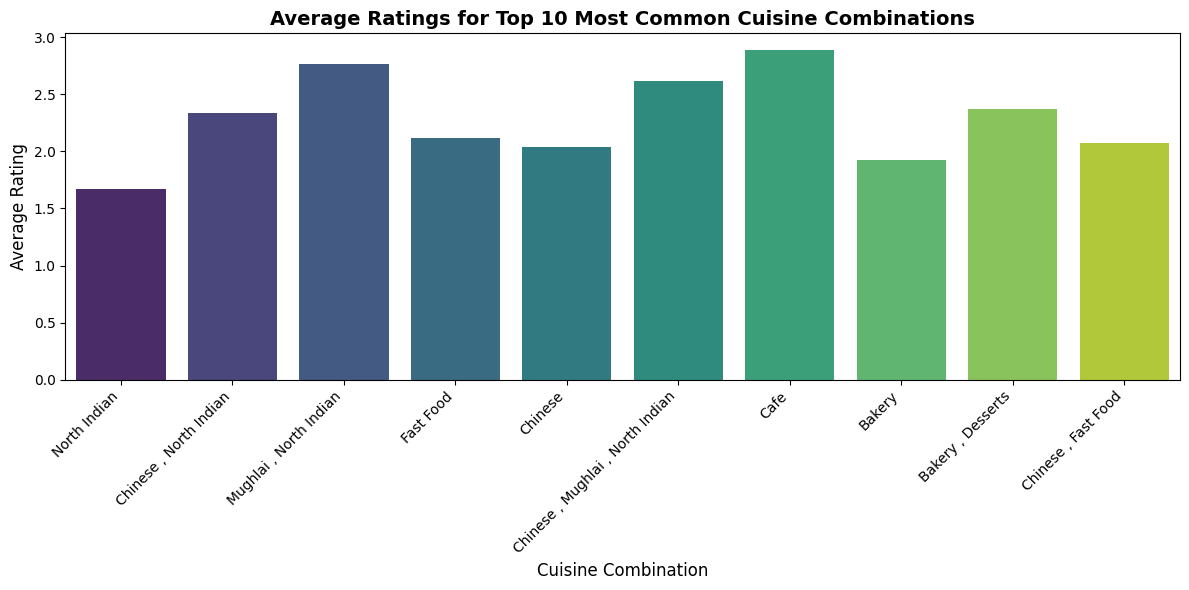

In [ ]:
top_10_combinations = list(cuisine_combination_counts.index)
avg_ratings_top_10 = [average_ratings_by_combination.get(combo, None) for combo in top_10_combinations]
top_10_combinations_str = [' , '.join(combo) for combo in top_10_combinations]
plot_data = pd.DataFrame({'Cuisine Combination': top_10_combinations_str, 'Average Rating': avg_ratings_top_10})
plot_data = plot_data.dropna()
plt.figure(figsize=(12, 6))
sns.barplot(x='Cuisine Combination', y='Average Rating', data=plot_data, palette='viridis', hue='Cuisine Combination', legend=False)
plt.title('Average Ratings for Top 10 Most Common Cuisine Combinations', fontsize=14, fontweight='bold')
plt.xlabel('Cuisine Combination', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

####**Analysis**

The chart compares the average ratings of the cuisine combinations that appear most frequently in the dataset.
- Interestingly, the most common single cuisine ("North Indian") has the lowest average rating among this group.
- "Cafe", despite being a common offering, tends to receive higher average ratings.
- Combining cuisines doesn't always guarantee a higher rating; for example, "Chinese, North Indian" has a moderate rating.

  This visualization helps us understand which of the popular cuisine combinations are generally favored by users in terms of ratings.

### **Task 3 : Geographic Analysis**

Visualizing the Restaurant Locations as a scatter plot to identify clusters.

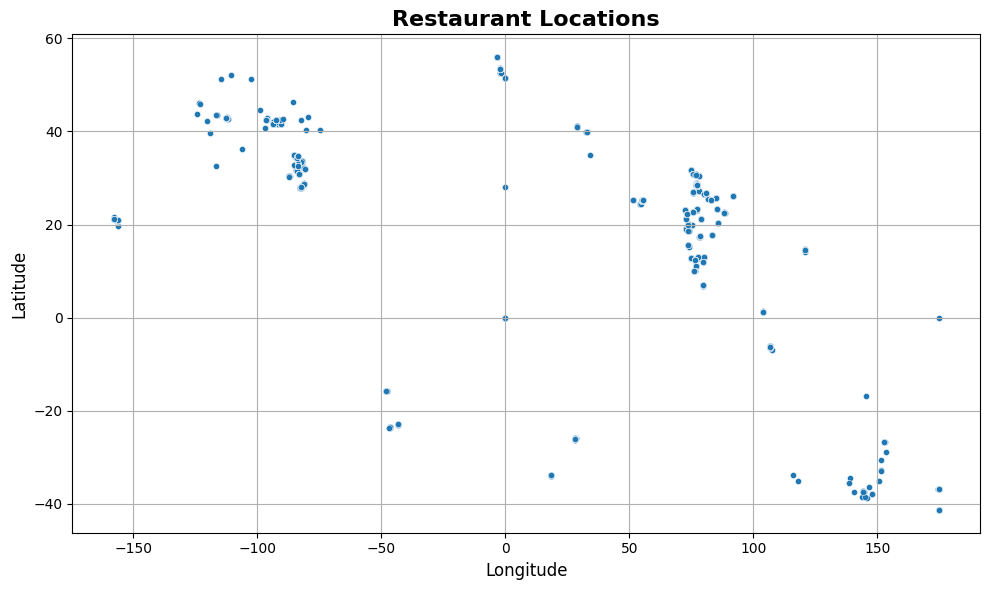

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=restaurant_df, x='Longitude', y='Latitude', s=20)
plt.title('Restaurant Locations', fontsize=16, fontweight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Creating a Map to plot Restaurant Locations to get clearer view of the clustered data points.

In [ ]:
# Using Folium to create a Map
import folium
# Determining the center of the locations for the initial map view
mean_latitude = restaurant_df['Latitude'].mean()
mean_longitude = restaurant_df['Longitude'].mean()
# Creating a folium map centered around the average coordinates
restaurant_map = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=4)
# Adding markers for each restaurant
for index, row in restaurant_df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=3,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(restaurant_map)
# Displaying the map
restaurant_map

####**Analysis**

Both the Scatter plot and the Map shows the Restaurant locations across the globe.
- The dataset has a strong representation of restaurants in the United States (Eastern part), India, and Australia (Eastern coast). These are likely key markets covered by the data.
- The scattered points elsewhere on the map indicate the presence of restaurants in other parts of the world, but in much smaller numbers compared to the identified clusters.
- The lack of significant clusters in other large landmasses (like Africa or South America in this view) suggests that the dataset might be more focused on certain geographical regions.

In summary, by combining the scatter plot with the map, we can now understand the geographical context of the restaurant distribution, highlighting concentrations in specific countries or regions.

### **Task 4 : Restaurant Chains**

Identifying Restaurant chains.

In [ ]:
restaurant_name_counts = restaurant_df['Restaurant Name'].value_counts()
chains = restaurant_name_counts[restaurant_name_counts > 1]
print("Identified Restaurant Chains (appearing more than once):")
print(chains)

Identified Restaurant Chains (appearing more than once):
Restaurant Name
Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
                    ..
Fish Streat          2
Adarsh Kulfi         2
Senorita's           2
Mahi Rasoi           2
Din Tai Fung         2
Name: count, Length: 734, dtype: int64


Getting the names of the chains.

In [ ]:
chain_names = chains.index.tolist()
chains_df = restaurant_df[restaurant_df['Restaurant Name'].isin(chain_names)]

Analyzing results and popularity of the different restaurant chains.

In [ ]:
chain_analysis = chains_df.groupby('Restaurant Name').agg(
    average_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    restaurant_count=('Restaurant Name', 'count')
).sort_values(by='restaurant_count', ascending=False)
print("\nAnalysis of Restaurant Chains:")
print(chain_analysis)


Analysis of Restaurant Chains:
                              average_rating  total_votes  restaurant_count
Restaurant Name                                                            
Cafe Coffee Day                     2.419277         2428                83
Domino's Pizza                      2.740506         6643                79
Subway                              2.907937         6124                63
Green Chick Chop                    2.672549          964                51
McDonald's                          3.339583         5291                48
...                                      ...          ...               ...
Aggarwal Sweets & Restaurant        1.350000           11                 2
Aggarwal Sweet & Bakers             1.450000            5                 2
Aggarwal Bikaneri Sweets            1.450000           11                 2
Adyar Ananda Bhavan                 3.150000          407                 2
Adarsh Kulfi                        1.500000           1

Visual representation of the Average ratings of Top 10 chains.

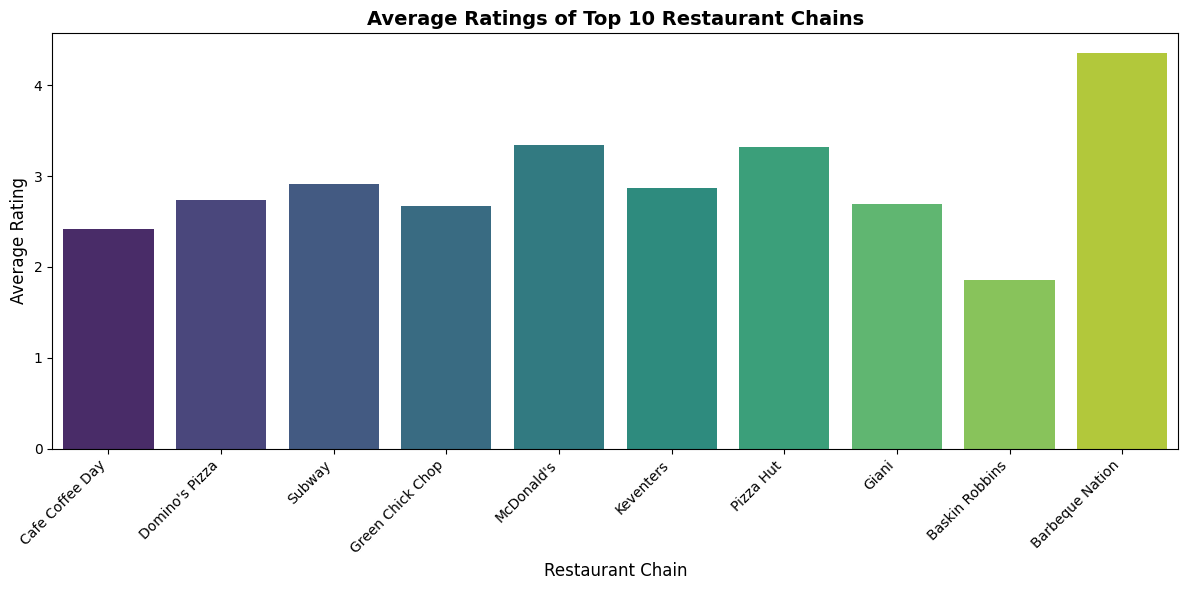

In [ ]:
# Get the top 10 chains by restaurant count
top_10_chains = chain_analysis.nlargest(10, 'restaurant_count')

# 1. Average Ratings of Top 10 Chains
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_chains.index, y=top_10_chains['average_rating'], palette='viridis', hue=top_10_chains.index, legend=False)
plt.title('Average Ratings of Top 10 Restaurant Chains', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Chain', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Visual representation of the Total votes for Top 10 chains.

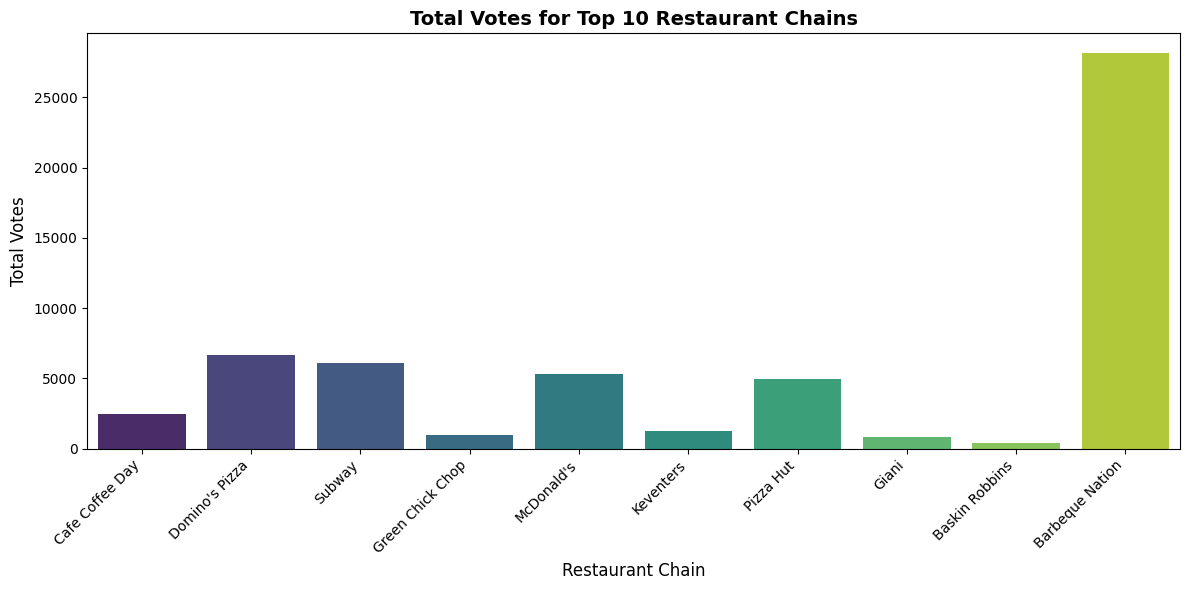

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_chains.index, y=top_10_chains['total_votes'], palette='viridis', hue=top_10_chains.index, legend=False)
plt.title('Total Votes for Top 10 Restaurant Chains', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant Chain', fontsize=12)
plt.ylabel('Total Votes', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

####**Analysis**

From Average rating and Total votes of the top restaurant chains identified we can say that :
- Barbeque Nation appears to be a high-performing chain in terms of both average rating and customer engagement (votes) within this dataset's top 10.
- High presence (like Cafe Coffee Day) doesn't necessarily translate to high average ratings or high total votes.
- There isn't always a direct correlation between the average rating and the total number of votes; some chains might have a decent rating but lower engagement, and vice versa.

## **Level 3**

---



### **Task 1 : Restaurant Reviews**

Importing necessary libraries.

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re

Downloading necessary NLTK resources.

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

Identifying the most common positive and negative reviews.

In [ ]:
# Creating functions to identify most common positive and negative keywords
def get_sentiment_from_rating_text(rating_text):
    if rating_text in ['Excellent', 'Very Good']:
        return 'positive'
    elif rating_text in ['Poor', 'Average', 'Not rated']:
        return 'negative' # Treating 'Average' and 'Not rated' as somewhat negative for this analysis
    else:
        return None
restaurant_df['Sentiment'] = restaurant_df['Rating text'].apply(get_sentiment_from_rating_text)
restaurant_df_with_sentiment = restaurant_df.dropna(subset=['Sentiment', 'Rating text'])
stop_words = set(stopwords.words('english'))
def get_keywords(text, sentiment):
    if not isinstance(text, str) or pd.isna(text):
        return []
    text = re.sub(r'[^\w\s]', '', text).lower()
    tokens = word_tokenize(text)
    keywords = [word for word in tokens if word not in stop_words and word.isalpha()]
    return keywords
positive_reviews = restaurant_df_with_sentiment[restaurant_df_with_sentiment['Sentiment'] == 'positive']
negative_reviews = restaurant_df_with_sentiment[restaurant_df_with_sentiment['Sentiment'] == 'negative']
positive_keywords = positive_reviews['Rating text'].apply(lambda x: get_keywords(x, 'positive')).explode()
negative_keywords = negative_reviews['Rating text'].apply(lambda x: get_keywords(x, 'negative')).explode()
top_positive_keywords = Counter(positive_keywords).most_common(20)
top_negative_keywords = Counter(negative_keywords).most_common(20)
print("Top Positive Words in 'Rating text':", top_positive_keywords)
print("\nTop Negative Words in 'Rating text':", top_negative_keywords)

Top Positive Words in 'Rating text': [('good', 1079), ('excellent', 301)]

Top Negative Words in 'Rating text': [('average', 3737), ('rated', 2148), ('poor', 186)]


####**Partially complete/Incomplete Analysis (Due to lack of data)**

Due to the absence of a dedicated column containing full-text reviews, I adapted the task to analyze the 'Rating text' column, which contains short descriptions associated with the aggregate rating.

I defined "positive" sentiment for ratings with the text 'Excellent' or 'Very Good', and "negative" sentiment for 'Poor', 'Average', or 'Not rated'.

My analysis of the most common words within these sentiment categories in the 'Rating text' revealed:

- **Top Positive Words:** 'good' and 'excellent' were the most frequent words associated with positively rated restaurants.
- **Top Negative Words:** 'average', 'rated', and 'poor' were the most frequent words associated with negatively rated restaurants.

I was unable to calculate the average length of full reviews or explore the relationship between review length and rating because the dataset does not contain a column with full-text customer reviews.

This analysis provides a limited insight into the language used to describe restaurant ratings in the dataset. For a more comprehensive text review analysis, a column containing the full text of the reviews would be necessary.

### **Task 2 : Votes Analysis**

Identifying the restaurants with the highest and lowest number of votes.

In [ ]:
highest_voted_restaurants = restaurant_df.nlargest(10, 'Votes')
lowest_voted_restaurants = restaurant_df.nsmallest(10, 'Votes')
print("Restaurants with the Highest Number of Votes:")
print(highest_voted_restaurants[['Restaurant Name', 'Votes', 'Aggregate rating']])  # Displaying name, votes, and rating
print("\nRestaurants with the Lowest Number of Votes:")
print(lowest_voted_restaurants[['Restaurant Name', 'Votes', 'Aggregate rating']])

Restaurants with the Highest Number of Votes:
                Restaurant Name  Votes  Aggregate rating
728                        Toit  10934               4.8
735                    Truffles   9667               4.7
3994           Hauz Khas Social   7931               4.3
2412                  Peter Cat   7574               4.3
739   AB's - Absolute Barbecues   6907               4.6
2414            Barbeque Nation   5966               4.9
743                 Big Brewsky   5705               4.5
2307  AB's - Absolute Barbecues   5434               4.9
736             The Black Pearl   5385               4.1
2411                      BarBQ   5288               4.2

Restaurants with the Lowest Number of Votes:
        Restaurant Name  Votes  Aggregate rating
69     Cantinho da Gula      0               0.0
874       The Chaiwalas      0               0.0
879  Fusion Food Corner      0               0.0
880       Punjabi Rasoi      0               0.0
887       Baskin Robbin      0      

Analyzing the correlation between the number of votes and the rating of a restaurant.

In [ ]:
correlation = restaurant_df['Votes'].corr(restaurant_df['Aggregate rating'])
print(f"\nCorrelation between Number of Votes and Aggregate Rating: {correlation:.2f}")


Correlation between Number of Votes and Aggregate Rating: 0.31


Visual representation of the relationship between the number of votes and rating.

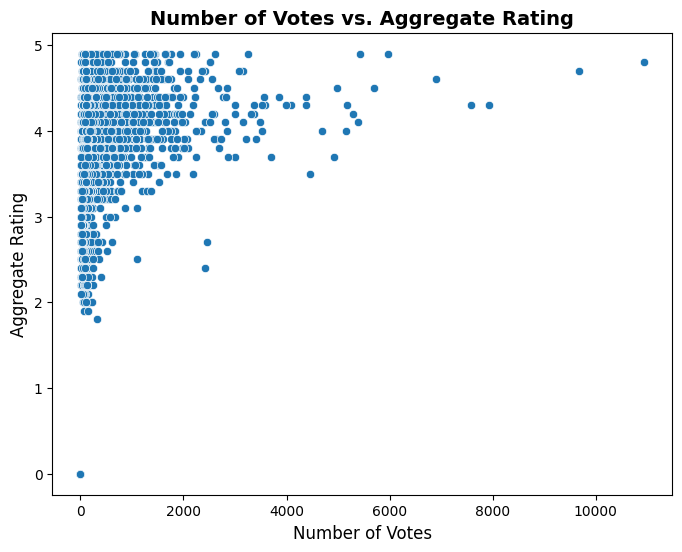

In [ ]:
# Visualizing the relation with scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=restaurant_df, x='Votes', y='Aggregate rating')
plt.title('Number of Votes vs. Aggregate Rating', fontsize=14, fontweight='bold')
plt.xlabel('Number of Votes', fontsize=12)
plt.ylabel('Aggregate Rating', fontsize=12)
plt.show()

####**Analysis**


The scatter shows the relationship between the restaurant ratings and the votes.
- **Popularity and Rating:** The plot suggests a tendency for restaurants with a higher number of votes (more popular) to generally have higher ratings. While there are exceptions, as I don't see many highly-voted restaurants with very poor ratings.
- **Low Vote Variability:** Restaurants with a low number of votes exhibit a wider range of ratings, from very low to very high. This could be because with fewer opinions, the average rating can be more easily influenced by a few very positive or very negative experiences.
- **No Strong Linear Relationship:** While there's a general upward trend, the points are quite scattered, indicating that the relationship between the number of votes and the aggregate rating isn't a strong linear one. A high number of votes doesn't guarantee a very high rating, and a high rating can be achieved with a moderate number of votes.

To quantify this relationship, I have calculated the correlation coefficient, which is 0.31, indicating a weak positive correlation. The scatter plot visually supports this weak positive trend.

### **Task 3 : Price Range vs. Online Delivery and Table Booking**

Examining the distribution of 'Has Online delivery' and 'Has Table booking' across different 'Price range' categories.

In [ ]:
# Converting 'Has Online delivery' and 'Has Table booking' to boolean (True/False)
restaurant_df['Online Delivery'] = restaurant_df['Has Online delivery'].apply(lambda x: True if x == 'Yes' else False)
restaurant_df['Table Booking'] = restaurant_df['Has Table booking'].apply(lambda x: True if x == 'Yes' else False)
# Analyzing the relationship between Price range and Online Delivery
online_delivery_by_price = restaurant_df.groupby('Price range')['Online Delivery'].mean()
print("Proportion of Restaurants with Online Delivery by Price Range:")
print(online_delivery_by_price)
# Analyzing the relationship between Price range and Table Booking
table_booking_by_price = restaurant_df.groupby('Price range')['Table Booking'].mean()
print("\nProportion of Restaurants with Table Booking by Price Range:")
print(table_booking_by_price)

Proportion of Restaurants with Online Delivery by Price Range:
Price range
1    0.157741
2    0.413106
3    0.291903
4    0.090444
Name: Online Delivery, dtype: float64

Proportion of Restaurants with Table Booking by Price Range:
Price range
1    0.000225
2    0.076775
3    0.457386
4    0.467577
Name: Table Booking, dtype: float64


Visual representation of analyzed proportions.

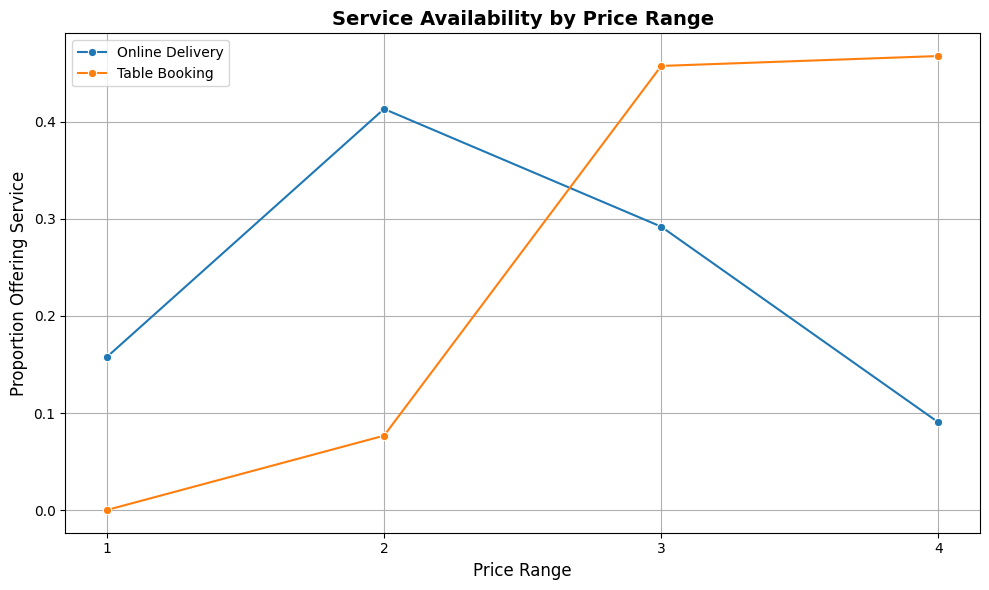

In [ ]:
# Visual of these proportions with line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x=online_delivery_by_price.index, y=online_delivery_by_price.values, marker='o', label='Online Delivery')
sns.lineplot(x=table_booking_by_price.index, y=table_booking_by_price.values, marker='o', label='Table Booking')
plt.title('Service Availability by Price Range', fontsize=14, fontweight='bold')
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Proportion Offering Service', fontsize=12)
plt.xticks(online_delivery_by_price.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

####**Analysis**

Online Delivery is most prevalent in the mid-price ranges (especially Price Range 2) and less common in the lowest and highest price ranges.
- This suggests that online delivery might be a key offering for restaurants trying to cater to a broad mid-range market.
- Higher-end restaurants might focus less on delivery, and very budget-friendly ones might lack the infrastructure.

Table Booking shows a strong positive correlation with price range.
- As the price range increases, the proportion of restaurants offering table booking also increases significantly.
- Table booking is much more common in Price Ranges 3 and 4 (the higher-priced categories) compared to Price Ranges 1 and 2.
- This makes sense, as higher-end restaurants often rely on reservations.

In summary, online delivery is most popular in the middle price tiers, while table booking is strongly associated with higher-priced restaurants.

## **Conclusion**

From looking at this restaurant data, I've seen some interesting things!
- Most restaurants got ratings in the middle range **(3-4)**.

- The most common kinds of food were **North Indian, Chinese, and Fast Food**.

- When I looked at the map, it seemed like there were more restaurants in certain areas, like **parts of the US, India, and Australia**.

- I also checked out restaurant chains, and one called **Barbeque Nation** seemed to do really well with ratings and how many people voted for it.

- Even though we didn't have full reviews, looking at the short descriptions of ratings, words like **"good"** came up a lot for positive ratings.

- It looks like restaurants **with more votes** tend to have **slightly better ratings** overall.

- Also, if a restaurant was in the **middle price range**, they were more likely to **do online delivery**.

- If a restaurant was **pricier**, they were more likely to let you **book a table**.

So, in short, this data gives a peek into what kinds of restaurants are popular, where they are, and some things about their ratings and services. There's probably even more to learn by digging deeper!